![OKCupid banner](./OKCupid.jpg)

# OK Cupid - Date a scientist!

## 1. Introduction
The aim of this project is to utilise data made available in public dating apps like "OK Cupid" to analyse dating trends and preferences. The ultimate goal is to develop a machine learning model that can make accurate predictions based on this dataset.

### Main Questions
* Which profile features are the most predictive of self-reported gender on OKCupid?
* Can lifestyle and demographic features predict whether a user owns pets?
* How accurately can a user's income be predicted based on demographic features?
* Which features consistently matter most across different prediction tasks and models?

### Data Sources
The data utilised here, `profiles.csv` was obtained through the [Codecademy platform](https://www.codeademy.com).

## 2. Scope
### Project Goals
On this project I'll be performing data wrangling on the dataset provided and building accurate predictions through machine learning. The main question of this project revolves around which features have more weight across all models, allowing us to know which features should be more prominent when building models with similar characteristics.

### Data
The data used in this project was provided by [Codecademy](https://www.codeademy.com) and consists of one file named `profiles.csv` where each row corresponds to a user and each column is a response to one of the profile questions, and those can be either multiple choice or short answer.

### Analysis
We'll be exploring the data with EDA to understand the features and distributions of the variables and the relationship between them. We'll also build some machine learning models to make predictions using supervised algorithms.

### Evaluation
The project will conclude with an assessment of several models and a comparison between them using different metrics, such as accuracy, precision, recall and F1. We'll identify which features are more important across all models, with higher correlations.

## 3. Exploratory Data Analysis
### Importing relevant libraries
Before we can start the proper data wrangling, we need to import the libraries and methods we'll be using throughout the project.

In [1]:
# Pandas and Numpy to be able to handle data
import pandas as pd
import numpy as np

# Plotting modules and libraries
from matplotlib import pyplot as plt

# Machine learning related libraries and modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,\
confusion_matrix, classification_report, ConfusionMatrixDisplay

### Loading the Data
As the data was too large to be uploaded as a `.csv` file directly to [GitHub](https://github.com/), it had to be uploaded as a `.zip` file,  fortunately, pandas can read the file directly from the compressed folder.

In [2]:
profiles = pd.read_csv('profiles.zip')

### Exploring the data
Let's start exploring the data now. The first thing I'll do is to display the top 3 rows of the dataframe to make sure everything is loaded correctly. Next, I'll display column information and get summary statistics on the dataframe.

In [3]:
# Displaying the first 3 rows of the dataframe
display(profiles.head(3))

# Printing out information about the columns
profiles.info()

# Displaying summary statistics
profiles.describe()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


From this initial exploratory analysis we observe that the dataset consists of 59,946 rows and 31 columns. Of these columns, three are continuous numerical variables: `age`, `height` and `income`, while the remainder are of `object` type, representing categorical data or free-text responses. <br>
Several columns contain missing values, especially `offspring`, `religion` and the essay-related fields. The presence of missing values may itself be informative, as non-response could reflect user preferences or sensitivity around certain topics.<br>
Further investigation reveals that the essay fields correspond to free-text responses in which users describe themselves, answering questions such as a self-summary, personal interests, and lifestyle descriptions as follows:
|Variable|Question|
|---|---|
|essay0|Self-Summary|
|essay1|What am I doing with my life?|
|essay2|I'm really good at...|
|essay3|The first thing people notice about me...|
|essay4|Favorite books, movies, shows, music and food|
|essay5|Six things I could never do without|
|essay6|I spend a lot of time thinking about...|
|essay7|On a typical Friday night I am...|
|essay8|The most private thing I'm willing to admit|
|essay9|You should message me if...|

Examination of the numerical features reveals the presence of implausible values, such as a maximum age of 110 years or a minimum height of 1 inch. These values suggest the existence of erroneous entries and potential outliers that will require cleaning or filtering prior to modelling.<br>
Finally, while the last_online variable would more appropriately be represented as a datetime object, it will not be converted in this project since it is not intended to be used as a predictive feature.


Based on this analysis, preprocessing steps will include handling missing values, encoding categorical variables, and addressing outliers in numerical features.
We can start by plotting the distribution of the numerical values.

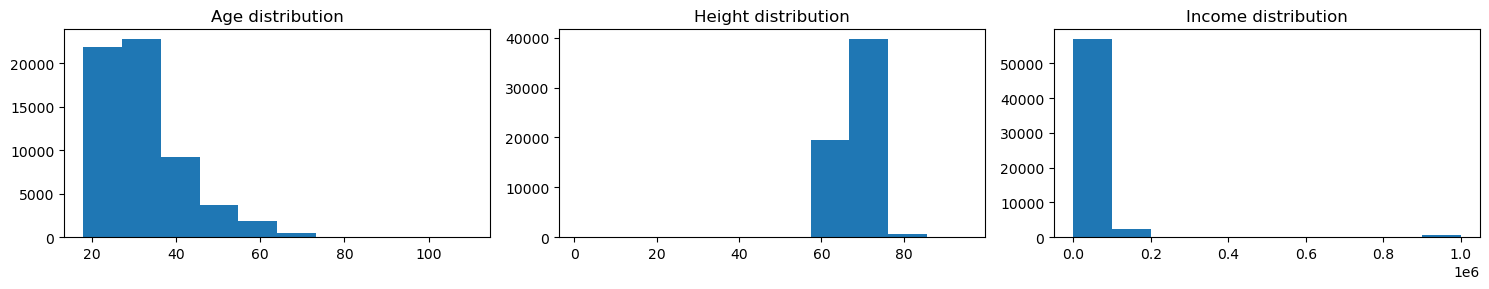

In [4]:
# Plotting the distribution of the numerical data
fig, ax = plt.subplots(1, 3, figsize = (15, 3))
ax[0].hist(profiles['age'])
ax[0].set_title('Age distribution')
ax[1].hist(profiles['height'])
ax[1].set_title('Height distribution')
ax[2].hist(profiles['income'])
ax[2].set_title('Income distribution')
plt.tight_layout()
plt.show()

In [5]:
# Investigating implausible values in numerical features
display(profiles[profiles['age']>70].head(5))
print(profiles['height'][profiles['height']<50].value_counts())
print (profiles['height'][profiles['height']>85].value_counts())
print (profiles['income'][profiles['income']<10000].value_counts())

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
2512,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"daly city, california",NaN,straight,NaN,NaN,f,NaN,NaN,english,single
25324,109,athletic,mostly other,NaN,never,working on masters program,NaN,NaN,NaN,nothing,...,"san francisco, california",might want kids,straight,NaN,other and somewhat serious about it,m,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),available


height
36.0    11
43.0     2
48.0     2
37.0     2
8.0      1
3.0      1
42.0     1
6.0      1
47.0     1
49.0     1
9.0      1
1.0      1
26.0     1
4.0      1
Name: count, dtype: int64
height
95.0    20
91.0     3
94.0     3
88.0     2
87.0     1
93.0     1
86.0     1
90.0     1
92.0     1
89.0     1
Name: count, dtype: int64
income
-1    48442
Name: count, dtype: int64


The information displayed above revealed the presence of implausible data:
* Age: Ages above 80 years old are very unlikely in dating apps, so the rows where the data is specified as 109 and 110 are either fake or mistakes. These values are considered outliers, and even if they represent a very small fraction of the data, they can still skew the analysis.
* Height: Values below 50 inches and above 85 inches are very unlikely for healthy adult human beings, so those data points can also be considered fake or erroneous.
* Income: The data is heavily skewed towards the value `-1`, which is not a real income value but instead indicates that the user didn't disclose their income, therefore, this data does not represent actual income information.


Based on this, we can safely remove the rows where `age` is over 80 and `height` is under 50 and over 85 inches. As for income, we can replace the `-1` values present in the data with `NaN` values, which is what it really represents.

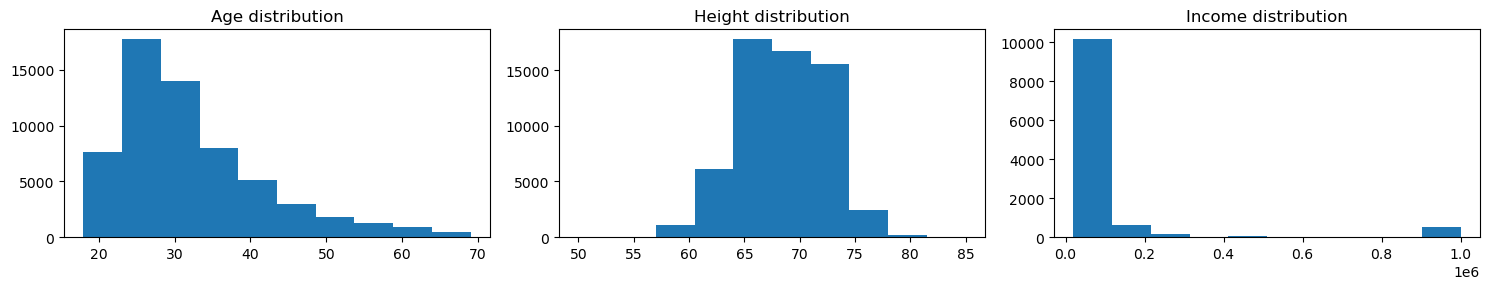

In [6]:
# Clean age, height and income
profiles = profiles[(profiles['age'] >= 18) & (profiles['age'] <= 80)]
profiles = profiles[(profiles['height'] >= 50) & (profiles['height'] <= 85)]
profiles['income'] = profiles['income'].replace(-1, np.nan)

# Re-Plotting the distribution of the numerical data
fig, ax = plt.subplots(1, 3, figsize = (15, 3))
ax[0].hist(profiles['age'])
ax[0].set_title('Age distribution')
ax[1].hist(profiles['height'])
ax[1].set_title('Height distribution')
ax[2].hist(profiles['income'])
ax[2].set_title('Income distribution')
plt.tight_layout()
plt.show()

This plot representation is more realistic and better shows the distribution of our numerical features.

As for missing values, missing information **is** information, so we'll be replacing the `NaN` values in categorical columns with `unknown` values, and in numerical features, we're only missing 3 values in the `height` column, so we can replace those values with the median of the column to try and preserve as much information as we can with minimal influence on the data. As for `income`, we can leave the empty values for now, and we'll address the situation when we're trying to predict income brackets.

In [7]:
# Replacing `NaN` values in the categorical columns with `unkown`
cat_cols = ['job', 'education', 'diet', 'body_type', 'smokes', 'drinks', 'pets']

for col in cat_cols:
    profiles[col] = profiles[col].fillna('Unknown')

# Replacing `NaN` values in height with the median
profiles['age'] = profiles['age'].fillna(profiles['age'].median())

## 4. Prediction algorithms
### 4.1 Which profile features are the most predictive of self-reported gender on OKCupid?
Now that the initial exploratory data analysis has been done and the data has been cleaned, we can begin addressing our research questions. To discern which features more strongly influence the prediction of a user's gender, we define the target variable as `sex` and select the following feature set: `age`, `height`, `education`, `job`, `smokes`, `drinks`, `body_type` and `diet`.

Since the target variable is binary (the user is reporting as male or female), a `Logistic Regression` is the appropriate choice for this task. 
Before fitting the model, all categorical variables must be encoded, and the dataset must be split into training and testing subsets to allow for proper evaluation of model performance.

In [8]:
# Displaying the values of the categorical features to get a feeling of their representation
print(profiles['education'].value_counts(), '\n')
print(profiles['job'].value_counts(), '\n')
print(profiles['smokes'].value_counts(), '\n')
print(profiles['drinks'].value_counts(), '\n')
print(profiles['body_type'].value_counts(), '\n')
print(profiles['diet'].value_counts(), '\n')

education
graduated from college/university    23944
graduated from masters program        8957
Unknown                               6614
working on college/university         5709
working on masters program            1682
graduated from two-year college       1529
graduated from high school            1425
graduated from ph.d program           1270
graduated from law school             1120
working on two-year college           1072
dropped out of college/university      995
working on ph.d program                982
college/university                     799
graduated from space camp              654
dropped out of space camp              518
graduated from med school              446
working on space camp                  443
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
d

The categorical features have a high number of different values that we need to encode. To achieve this, we'll need to transform the features by binning them to reduce the dimensionality of the dataframe:
* `education`: `Masters/PhD`, `University/College`, `Highschool`, `Other`
* `job`: `Tech/Engineering`, `Arts/Media`, `Business/Finance`, `Medical/Health`, `Education`, `Law/Politics`, `Hospitality/Travel`, `Trades/Construction`, `Clerical/Admin`, `Student`, `Other`
* `body_type`: `Average/Athletic`, `Think/Skinny`, `Curvy/Full`, `Very Muscular`, `Other`
* `diet`: `Unrestricted`, `Vegetarian`, `Vegan`, `Halal/Kosher`, `Other`

In [9]:
# Defining functions to bin the features
def bin_education(edu):
    edu = str(edu).lower()
    if 'masters' in edu or 'ph.d' in edu:
        return 'Masters/PhD'
    elif 'college' in edu:
        return 'University/College'
    elif 'high school' in edu:
        return 'Highschool'
    else:
        return 'Other'

def bin_job(job):
    job = str(job).lower()
    if 'tech' in job or 'computer' in job or 'engineering' in job:
        return 'Tech/Engineering'
    elif 'artistic' in job or 'musical' in job or 'writer' in job or 'media' in job or 'entertainment' in job:
        return 'Arts/Media'
    elif 'sales' in job or 'marketing' in job or 'biz dev' in job or 'executive' in job or 'management' in job or 'financial' in job or 'banking' in job or 'real estate' in job:
        return 'Business/Finance'
    elif 'medicine' in job or 'health' in job:
        return 'Medical/Health'
    elif 'education' in job or 'academia' in job:
        return 'Education'
    elif 'law' in job or 'legal' in job or 'political' in job or 'government' in job:
        return 'Law/Politics'
    elif 'hospitality' in job or 'travel' in job or 'transportation' in job:
        return 'Hospitality/Travel'
    elif 'construction' in job or 'craftsmanship' in job:
        return 'Trades/Construction'
    elif 'clerical' in job or 'administrative' in job:
        return 'Clerical/Admin'
    elif 'student' in job:
        return 'Student'
    else:
        return 'Other'

def bin_body_type(bt):
    bt = str(bt).lower()
    if 'average' in bt or 'fit' in bt or 'athletic' in bt:
        return 'Average/Athletic'
    elif 'thin' in bt or 'skinny' in bt:
        return 'Thin/Skinny'
    elif 'curvy' in bt or 'full' in bt or 'fat' in bt:
        return 'Curvy/Full'
    elif 'jacked' in bt:
        return 'Very Muscular'
    else:
        return 'Other'

def bin_diet(d):
    d = str(d).lower()
    if 'anything' in d:
        return 'Unrestricted'
    elif 'vegetarian' in d:
        return 'Vegetarian'
    elif 'vegan' in d:
        return 'Vegan'
    elif 'halal' in d or 'kosher' in d:
        return 'Halal/Kosher'
    else:
        return 'Other/Unknown'

# Applying the functions so the features are binned
profiles['education_bin'] = profiles['education'].apply(bin_education)
profiles['job_bin'] = profiles['job'].apply(bin_job)
profiles['body_type_bin'] = profiles['body_type'].apply(bin_body_type)
profiles['diet_bin'] = profiles['diet'].apply(bin_diet)

In [10]:
# Dividing the data into target and feature dataframes
profiles['sex'] = (profiles['sex'] == 'm').astype(int)
X = profiles[['age', 'height', 'education_bin', 'job_bin', 'smokes', 'drinks', 'body_type_bin', 'diet_bin']]
y = profiles['sex']

Since the necessary features are now binned into appropriate categories and the target and features dataframes are instanced, we can proceed by One-hot Encoding the dataframe.

In [11]:
X = pd.get_dummies(X, drop_first=True)

The next step is to separate the `X` dataframe into train and test sets.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We are now ready to instantiate a `Logistic Regressor` and fit it.

In [13]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

We can now use our test set to confirm the accuracy and other relevant scores of our predictor.

In [14]:
y_pred = logreg.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print(f'Precision: {precision_score(y_test, y_pred):.3f}')
print(f'Recall: {recall_score(y_test, y_pred):.3f}')
print(f'F1: {f1_score(y_test, y_pred):.3f})')

Accuracy: 0.873
Precision: 0.882
Recall: 0.911
F1: 0.896)


From the calculated scores, we can confirm that the model's performance is good:
* Accuracy is 87.3%, meaning that most predictions were correct.
* Precision is 88.3%, confirming we had few false positives.
* Recall is 91%, showing the model had few false negatives as well.
* F1 score is 89.6%, meaning the model is both accurate and balanced in predictions.

These scores mean that the model is doing well at predicting the gender of a user and that the model is not biased towards one gender or another.

Because features are scaled and models are linear, coefficient magnitude is used as a proxy for feature importance. Looking at the coefficients for our model, we can identify which features influence the prediction the most.

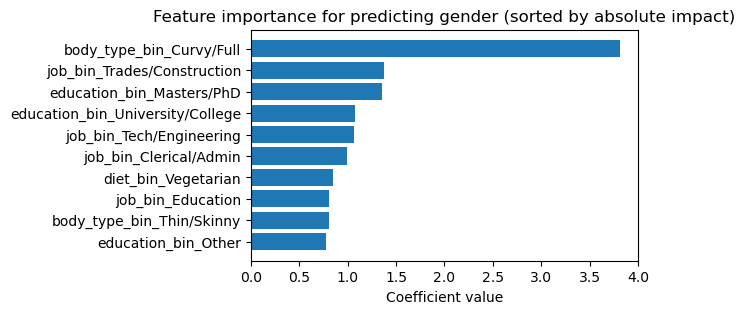

In [15]:
#Getting the coefficients
coef_df = pd.DataFrame({
    'feature': x_train.columns,
    'coefficient': logreg.coef_[0]  # 0 because coef_ is 2D array
})

# Sort by absolute effect
coef_df['coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='coefficient', ascending=False)

# Displaying a plot of coeficient weight
plt.figure(figsize=(5,3))
plt.barh(coef_df['feature'].head(10), coef_df['coefficient'].head(10))
plt.xlabel('Coefficient value')
plt.title('Feature importance for predicting gender (sorted by absolute impact)')
plt.gca().invert_yaxis()
plt.show()

Above we can see a plot of the 10 one-hot encoded features with more weight on deciding the prediction value, but that doesn't give us the original features with more weight. To do that, we need to separate the features by original variable and aggregate the coefficients per original feature.

In [16]:
# Function to get the original variable name
def original_var(name):
    if '_' in name:
        return name.split('_')[0]  # e.g., 'education_graduated from college/university' → 'education'
    else:
        return name  # for numeric variables like 'age', 'height'

coef_df['original_feature'] = coef_df['feature'].apply(original_var)

# Agreggating coefficients
agg_df = coef_df.groupby('original_feature')['coefficient'].apply(lambda x: np.sum(np.abs(x))).reset_index()
sex_imp_feats = agg_df.sort_values(by='coefficient', ascending=False)

print(sex_imp_feats)

  original_feature  coefficient
6              job     5.870167
1             body     5.308642
4        education     3.197944
2             diet     1.711381
3           drinks     0.930681
5           height     0.660386
7           smokes     0.612576
0              age     0.009825


From here, we can see that the features that are more predictive of a user's gender are `job`, `body_type` and `education`.

### 4.2 Can lifestyle and demographic features predict whether a user owns pets?
The next step of our research is to confirm if we can predict whether a user owns pets. To do this, we follow a similar logic to the one used earlier, where we set a target and feature dataframes and encode them. We will need to determine if a user is a pet owner, and if true, which pets. This is accomplished by building two models: a binary model that helps us discover if a user is likely to have pets, and if affirmative, a multiclass model that can tell us which types of pet the person is likely to have.

In [17]:
# Confirming how the pets feature is composed, as this will be our target feature
profiles['pets'].value_counts()

pets
Unknown                            19899
likes dogs and likes cats          14799
likes dogs                          7221
likes dogs and has cats             4309
has dogs                            4131
has dogs and likes cats             2328
likes dogs and dislikes cats        2028
has dogs and has cats               1472
has cats                            1404
likes cats                          1062
has dogs and dislikes cats           549
dislikes dogs and likes cats         237
dislikes dogs and dislikes cats      195
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

As the target feature, we will use the `pets` feature. This feature is composed of several elements that state whether a person has any cats or dogs, likes cats or dogs or dislikes them. For our analysis, we are interested in splitting our feature into two separate ones, one which tells us if a user is a pet owner (`has_pet`) and one which conveys which kind of pet (`pet_type`). Pet type will look like this:
* `cats_and_dogs` - if a person has cats and dogs
* `cats` - if a person has cats only
* `dogs` - if a person has dogs only
* `NaN` - if a person doesn't own either


Once both features are ready, we'll use One-Hot Encoding on the dataset.

In [18]:
# Defining binning functions
def has_pet(pet):
    pet = str(pet).lower()
    return int('has dogs' in pet or 'has cats' in pet)

def categorize_pets(pet):
    pet = str(pet).lower()
    if 'has dogs' in pet and 'has cats' in pet:
        return 'cats_and_dogs'
    elif 'has dogs' in pet:
        return 'dogs'
    elif 'has cats' in pet:
        return 'cats'
    else:
        return np.nan
        
# Applying the functions
profiles['has_pet'] = profiles['pets'].apply(has_pet)
profiles['pets_bin'] = profiles['pets'].apply(categorize_pets)

# Selecting the feature set
X = profiles[['age', 'height', 'sex', 'education_bin', 'job_bin', 'smokes', 'drinks', 'body_type', 'diet_bin']]

# One hot encoding
X = pd.get_dummies(X, drop_first=False)

# Does the user have a pet?
y_pet = profiles['has_pet']

# Doing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y_pet, test_size = 0.2, random_state = 42)

Now that we have encoded our features, separated the feature and target dataframes and separated our sets into train and test sets, we can apply a classifier. Again, we're using a logistic regressor, as we have a binary category, which tells us whether a person has a pet or not.

In [19]:
# Instantiating the classifier and fitting it into the train set
logreg_pet_owner = LogisticRegression(max_iter = 10000, class_weight = 'balanced') 
# class_weight = balanced to balance the weights for the class imbalance
logreg_pet_owner.fit(x_train, y_train)

# Evaluating the classifier
y_pred = logreg_pet_owner.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1: {f1_score(y_test, y_pred):.2f}\n')

# Checking which features have higher coeficients

coef_df = pd.DataFrame({
    'feature': x_train.columns,
    'coef': logreg_pet_owner.coef_[0]
}).sort_values(by='coef', key=abs, ascending=False)
print(coef_df.head())

Accuracy: 0.61
Precision: 0.33
Recall: 0.60
F1: 0.43

                        feature      coef
2                           sex -0.737212
24               drinks_Unknown -0.500363
3      education_bin_Highschool  0.497972
4     education_bin_Masters/PhD -0.384314
17  job_bin_Trades/Construction  0.374053


The model achieves a moderate F1 score, with recall noticeably higher than precision. This indicates that the classifier is relatively effective at identifying users who own pets, but at the cost of incorrectly classifying a substantial number of non-pet owners as pet owners.

This behaviour is expected given the imbalance in the target variable and the use of class weighting, which prioritises correctly identifying pet owners over minimising false positives. As a result, accuracy is not the most informative metric in this context, and the F1 score provides a more balanced evaluation of the model’s performance.

This task appears inherently more challenging than predicting gender, as pet ownership is influenced by many external factors not represented in the dataset.


When looking at the strongest coefficients, it's noticeable that `sex` is the strongest predictor, identifying females as more likely to own pets (as in our `sex` feature `m=1`), and lifestyle features like drinking or smoking seem to outweigh socioeconomic ones.

Now, we can interpret which features are better suited to predicting if a user has pets or not.

In [20]:
# Map back to original features by splitting on '_' (the naming from get_dummies)
coef_df['orig_feature'] = coef_df['feature'].apply(lambda x: x.split('_')[0])

# Sum absolute coefficients per original feature
pet_imp_feats = coef_df.groupby('orig_feature')['coef'].apply(lambda x: np.sum(np.abs(x))).sort_values(ascending=False)

print("Original features ranked by summed coefficient magnitude:\n")
print(pet_imp_feats)


Original features ranked by summed coefficient magnitude:

orig_feature
body         2.602235
job          1.429349
smokes       1.109054
education    1.058431
drinks       1.022354
sex          0.737212
diet         0.368743
age          0.022109
height       0.005054
Name: coef, dtype: float64


`body_type`, `job`, and `smokes` are the features that most prominently influence the prediction of whether a user owns pets, with `education`, `drinks`, and `sex` also contributing meaningfully. This suggests that lifestyle and socioeconomic factors play an important role in pet ownership. Other unobserved factors, such as living environment (e.g., apartment vs. house), country, or cultural context, may also impact whether a person has pets.


Let's now look into the users that have pets and try to predict if they have cats, dogs or both.

Classification report:

               precision    recall  f1-score   support

         cats       0.54      0.46      0.50      1180
cats_and_dogs       0.14      0.41      0.21       280
         dogs       0.62      0.47      0.53      1395

     accuracy                           0.46      2855
    macro avg       0.44      0.45      0.41      2855
 weighted avg       0.54      0.46      0.49      2855



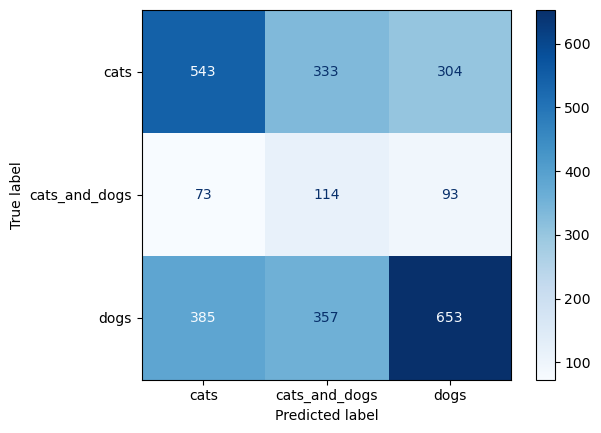

In [21]:
# Only keep users who own pets
owners = profiles[profiles['has_pet'] == 1].copy()

# Features (reuse binned and one-hot encoded features)
X_pet_type = owners[['age', 'height', 'sex', 'education_bin', 'job_bin', 'smokes', 'drinks', 'body_type', 'diet_bin']]
X_pet_type = pd.get_dummies(X_pet_type, drop_first=False)

# Target: cats / dogs / cats_and_dogs
y_pet_type = owners['pets_bin']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_pet_type, y_pet_type, test_size=0.2, random_state=42)

# Multiclass Logistic Regression
logreg_pet_type = LogisticRegression(max_iter=10000, class_weight='balanced', solver = 'lbfgs')
logreg_pet_type.fit(x_train, y_train)

# Predictions
y_pred = logreg_pet_type.predict(x_test)

# Evaluation
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()


This target is proving harder to predict, largely due to class imbalance. The model struggles especially with the cats_and_dogs class, predicting it correctly only 41% of the time, and sometimes misclassifies cats as dogs and vice versa. Overall, the model correctly predicts around 46% of cases, so it is capturing some of the patterns, but there is room for improvement.

Let's apply a Recursive Feature Elimination model to verify if we can improve our predictions.

Best n_features: 21, Weighted F1: 0.446


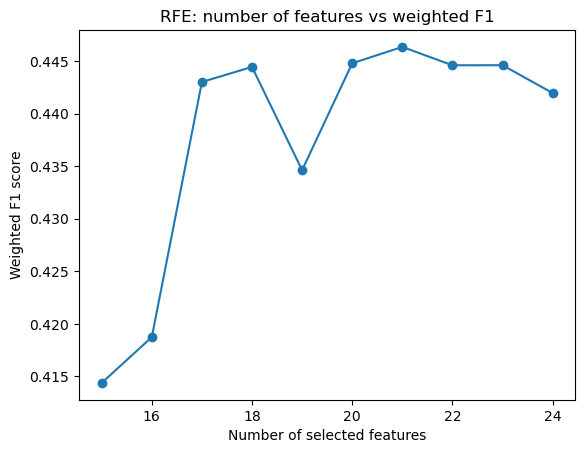

In [22]:
# Try n_features from 15 up to total number of features
# Store results
results = []
for n in range(15, 25):
    # Applying the RFE on our logistic regression classifier
    rfe = RFE(logreg_pet_type, n_features_to_select=n)
    rfe.fit(x_train, y_train)
    
    # Printing the selected features
    selected_features = x_train.columns[rfe.support_]
    
    logreg_pet_type.fit(x_train[selected_features], y_train)
    y_pred = logreg_pet_type.predict(x_test[selected_features])
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append((n, f1))


# Find best number of features
best_n, best_f1 = max(results, key=lambda x: x[1])
print(f'Best n_features: {best_n}, Weighted F1: {best_f1:.3f}')

# Optional: plot
import matplotlib.pyplot as plt
n_feats, f1_scores = zip(*results)
plt.plot(n_feats, f1_scores, marker='o')
plt.xlabel('Number of selected features')
plt.ylabel('Weighted F1 score')
plt.title('RFE: number of features vs weighted F1')
plt.show()

Above we can see a plot showing the optimal number of features to increase the F1 score of the classifier. We'll now print a list of the optimal features to achieve that score.

*Note: I had, on a previous iteration, come to the conclusion that a higher number of features than 15 was better for the model, but as it would just be repeating steps already done, I've decided to go straight to the `for` loop with the plot of the results for the F1 score.*

In [23]:
# Refit RFE with the best number of features
rfe_best = RFE(logreg_pet_type, n_features_to_select=best_n)
rfe_best.fit(x_train, y_train)

# Get the selected features
best_features = x_train.columns[rfe_best.support_]
print("Selected features for best F1 score:")
for feat in best_features:
    print("-", feat)

# Optional: Fit and evaluate one last time
logreg_pet_type.fit(x_train[best_features], y_train)
y_pred_best = logreg_pet_type.predict(x_test[best_features])
print(f'''\nWeighted scores on test set with best features: \nAccuracy score:{accuracy_score(y_test, y_pred_best):.2f}
\nPrecision score:{precision_score(y_test, y_pred_best, average='weighted'):.2f}
\nRecall score:{recall_score(y_test, y_pred_best, average='weighted'):.2f}
\nF1 score:{f1_score(y_test, y_pred_best, average='weighted'):.2f}''')

Selected features for best F1 score:
- sex
- education_bin_Highschool
- education_bin_Masters/PhD
- job_bin_Arts/Media
- job_bin_Clerical/Admin
- job_bin_Tech/Engineering
- smokes_Unknown
- smokes_yes
- drinks_Unknown
- drinks_desperately
- drinks_often
- drinks_socially
- drinks_very often
- body_type_athletic
- body_type_full figured
- body_type_jacked
- body_type_overweight
- body_type_rather not say
- body_type_thin
- diet_bin_Halal/Kosher
- diet_bin_Vegan

Weighted scores on test set with best features: 
Accuracy score:0.41

Precision score:0.52

Recall score:0.41

F1 score:0.45


These values indicate that the model struggles to predict the specific type of pet a user owns. The selected features have the most impact on the prediction, but even with the optimal subset, the model correctly classifies the type of pet less than half the time (F1 ~0.45). This reflects the difficulty of the task, likely due to class imbalance and overlapping patterns among pet owners. The scores suggest that while some predictive signal exists, predictions should be interpreted with caution.

Let's now find the original features that influence pet ownership the most.

In [24]:
# Get the coefficients for the selected features
coefs = logreg_pet_type.coef_[0]  # for multiclass, you might sum over classes

# Create a DataFrame with feature names and their coefficients
feat_df = pd.DataFrame({'feature': best_features, 'coef': coefs})

# Extract the original feature name (before one-hot)
feat_df['orig_feature'] = feat_df['feature'].apply(lambda x: x.split('_')[0])

# Sum absolute coefficients by original feature
pet_type_imp_feats = feat_df.groupby('orig_feature')['coef'].apply(lambda x: np.sum(np.abs(x))).sort_values(ascending=False)

print("Original features ranked by summed coefficient magnitude:")
print(pet_type_imp_feats)

Original features ranked by summed coefficient magnitude:
orig_feature
body         1.336023
job          1.034263
education    0.593722
drinks       0.480030
diet         0.402719
smokes       0.186960
sex          0.082798
Name: coef, dtype: float64


The features with the greatest influence when predicting what kind of pet a user owns are `body_type`, `job`, and `education`. This suggests that socioeconomic and lifestyle factors play a larger role than, for example, gender (`sex`) in determining pet ownership type. Other features such as `drinks`, `diet`, and `smokes` also contribute, though to a lesser degree.

### 4.3 How accurately can a user's income be predicted based on demographic features?
We can now tackle the third question, and to do that we'll check the values of `income`, create appropriate bins, choose a model to perform the classification on, and get some scores to evaluate our prediction.

*An initial attempt was made to model income using a Random Forest Regressor. However, the model consistently produced near-zero or negative R² scores, even after log transformation. Inspection of the income distribution revealed that income is reported in coarse, discrete steps and is highly skewed. As a result, income was instead treated as a categorical variable representing income brackets, which better reflects the structure of the data and leads to more interpretable and meaningful results. For this reason, the regression-based analysis is not retained in this notebook. Including it would be redundant, as it consistently led to the same conclusion: income is better modelled as a categorical rather than a continuous variable. Consequently, the analysis proceeds by reframing the problem as a classification task using income bins and applying a Random Forest Classifier.*()

In [25]:
# Check values of `income`
print('NaN values in "income":', profiles['income'].isna().sum())
print('Values of `income` sorted by income value:', profiles['income'].value_counts().sort_index())

# Drop rows with missing income
income_df = profiles.dropna(subset=['income']).copy()

NaN values in "income": 48400
Values of `income` sorted by income value: income
20000.0      2947
30000.0      1047
40000.0      1005
50000.0       974
60000.0       736
70000.0       707
80000.0      1110
100000.0     1621
150000.0      628
250000.0      149
500000.0       48
1000000.0     509
Name: count, dtype: int64


As the data is heavily skewed, we'll apply a logarithmic transformation to our dataframe and then bin `income` into appropriate brackets before proceeding with the classification.

In [26]:
# Applying log transform
income_df['income_log'] = np.log1p(income_df['income'])

# Creating the bins
income_df['income_bin_cat']  = pd.qcut(income_df['income_log'], q = 5, duplicates = 'drop')

# Creating the bin labels
income_df['income_bin_cat'].cat.categories 

# Get log-space intervals
log_intervals = income_df['income_bin_cat'].cat.categories

# Convert to normal income scale
normal_labels = [f"{int(round(np.expm1(interval.left), -4)):,} – {int(round(np.expm1(interval.right), -4)):,}" for interval in log_intervals]

# Applying new labels
income_df['income_bin_cat'] = income_df['income_bin_cat'].cat.rename_categories(normal_labels)
income_df['income_bin_cat'].head()

# Keeping creating income_bin for model target
income_df['income_bin'] = income_df['income_bin_cat'].cat.codes

income_df['income_bin_cat'].head()

1     70,000 – 100,000
3      20,000 – 40,000
11     20,000 – 40,000
13     20,000 – 40,000
14     40,000 – 70,000
Name: income_bin_cat, dtype: category
Categories (4, object): ['20,000 – 40,000' < '40,000 – 70,000' < '70,000 – 100,000' < '100,000 – 1,000,000']

Now that bins based on the logarithmic scale were created (so all bins have approximately the same count of values), we can proceed with separating the data into the target and features dataframes and then fitting and evaluating the model.

In [27]:
# Defining the target and feature dfs
X = income_df[['age', 'height', 'sex', 'education_bin', 'job_bin', 'smokes', 'drinks', 'body_type', 'diet_bin']]
y = income_df['income_bin_cat']

# OHE
X = pd.get_dummies(X, drop_first = False)

# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We can now instantiate our classifier, we're working with a Random Forest Classifier as we want the prediction of a categorical variable.

Random Forest Classifier scores:
Accuracy: 0.51
Precision: 0.47
Recall: 0.51
F1: 0.48
Classification Report:
                      precision    recall  f1-score   support

100,000 – 1,000,000       0.34      0.17      0.22       275
    20,000 – 40,000       0.63      0.79      0.70       946
    40,000 – 70,000       0.31      0.23      0.27       517
   70,000 – 100,000       0.43      0.45      0.44       559

           accuracy                           0.51      2297
          macro avg       0.43      0.41      0.41      2297
       weighted avg       0.47      0.51      0.48      2297



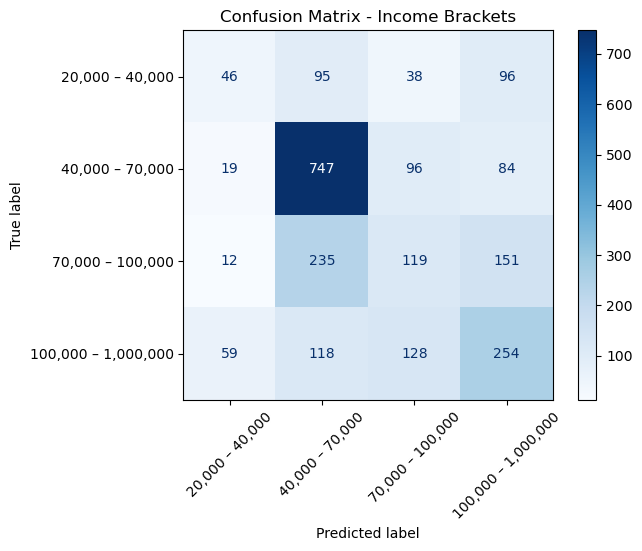

In [28]:
# Instancing the classifier
rfc = RandomForestClassifier(n_estimators = 200, random_state = 42, n_jobs = -1)
# n_jobs = -1 makes the machine use all cpus to perform faster, but also makes the machine busy while it runs

# Fitting the classifier
rfc.fit(x_train, y_train)

# Predicting based on test set
y_pred = rfc.predict(x_test)

# Evaluating the model
print(f'Random Forest Classifier scores:\n\
Accuracy: {accuracy_score(y_test, y_pred):.2f}\n\
Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}\n\
Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}\n\
F1: {f1_score(y_test, y_pred, average='weighted'):.2f}')

# Printing the classification report and confusion matrix
print('Classification Report:\n',classification_report(y_test, y_pred))

bin_labels = income_df['income_bin_cat'].cat.categories.tolist()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = bin_labels)
disp.plot(cmap = 'Blues', xticks_rotation = 45)
plt.title('Confusion Matrix - Income Brackets')
plt.show()

The Random Forest Classifier fares fairly well, achieving an overall accuracy of 51%, with a weighted F1 score of 0.48.
The model performs best on the lowest income bracket (20,000 - 40,000), achieving a recall of 79% and an F1 score of 0.70, suggesting it is effective at identifying lower-income users. Performance decreases for higher income brackets, especially at the highest income (100,000 - 1,000,000), where recall drops to 17%, indicating difficulty distinguishing the highest income group.
The confusion matrix shows that most misclassifications occur between adjacent income brackets, which is expected given the ordinal and continuous nature of income. This suggests that while the model captures broad income trends, it struggles to sharply separate neighbouring categories.

Overall, the model is better suited for coarse income stratification rather than precise income classification.

Next, we'll confirm which features have more weight for the Random Forest Classifier.

In [29]:
# raw feature importances from the model
importances = pd.DataFrame({'feature': x_train.columns, 'importance': rfc.feature_importances_}).sort_values(by='importance', ascending=False)

# Extract original feature name (prefix before first '_')
importances['orig_feature'] = importances['feature'].apply(lambda x: x.split('_')[0])

# Sum importance by original feature
income_imp_feats = importances.groupby('orig_feature')['importance'].sum().sort_values(ascending=False)
print(income_imp_feats)

orig_feature
age          0.248385
height       0.176443
job          0.165995
body         0.129152
drinks       0.073479
diet         0.071667
smokes       0.060013
education    0.054046
sex          0.020820
Name: importance, dtype: float64


For predicting the `income` variable, the features with the greatest influence are `age`, `height`, and `job`. `age` and `job` are expected predictors, reflecting career stage and profession. The prominence of `height` is less intuitive and may reflect indirect associations with factors not explicitly captured in the dataset, such as socioeconomic background, geographic location, or other demographic characteristics. Other features, including `body_type`, `drinks`, `diet`, and `smokes`, contribute moderately to the model, while `sex` has the least predictive power. Overall, the model highlights that both expected and less obvious factors play a role in predicting `income`.

### 4.4 Which features consistently matter most across different prediction tasks and models?
Across this project, we built different models for different tasks:
* Gender Prediction: Logistic Regression
* Pet Ownership: Logistic Regression + Logistic Regression (Multiclass)
* Income: Random Forest Classifier
Each model answers a different question, but they all share the same feature space. This leads to our question being reformulated in the following manner: *"Which features repeatedly appear as important, regardless of the target?"*<br>

We can address this by looking at the ranks of the different models used and confirming which features appear more prominently.

Feature raking across the four models used:


,Sex,Pet Ownership,Pet Type,Income
0,job,body,body,age
1,body,job,job,height
2,education,smokes,education,job
3,diet,education,drinks,body
4,drinks,drinks,diet,drinks
5,height,sex,smokes,diet
6,smokes,diet,sex,smokes


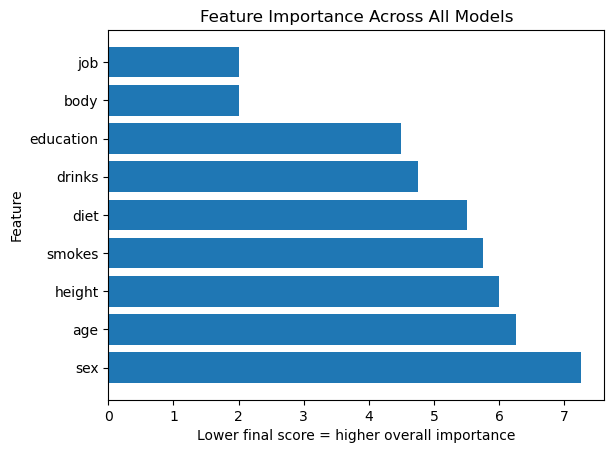

Sorted ranking of feature by importance across all rankings:


,feature,rank_sum,appearances,final_score
1,body,8,4,2.00
6,job,8,4,2.00
4,education,10,3,4.50
3,drinks,19,4,4.75
2,diet,22,4,5.50
8,smokes,23,4,5.75
5,height,8,2,6.00
0,age,1,1,6.25
7,sex,13,2,7.25


In [31]:
print('Feature raking across the four models used:')
top_n = 7
feature_ranking_df = pd.DataFrame({
    'Sex': sex_imp_feats.sort_values(by='coefficient', ascending=False).head(top_n)['original_feature'].values,
    'Pet Ownership': pet_imp_feats.sort_values(ascending=False).head(top_n).index,
    'Pet Type': pet_type_imp_feats.sort_values(ascending=False).head(top_n).index,
    'Income': income_imp_feats.sort_values(ascending=False).head(top_n).index
})

display(feature_ranking_df)


# Sort for nicer visualization
ranking_df_sorted = ranking_df.sort_values('final_score', ascending  = False)

plt.figure()
plt.barh(ranking_df_sorted['feature'],ranking_df_sorted['final_score'])
plt.xlabel('Lower final score = higher overall importance')
plt.ylabel('Feature')
plt.title('Feature Importance Across All Models')

plt.show()

def feature_ranking_table(data, penalty=8):
    n_cols = data.shape[1]
    rows = []

    for col in data.columns:
        for rank, feature in enumerate(data[col].values, start=1):
            rows.append({'feature': feature, 'rank': rank, 'model': col})

    df = pd.DataFrame(rows)

    summary = (df.groupby('feature').agg(rank_sum=('rank', 'sum'),appearances=('model', 'count')).reset_index())

    summary['final_score'] = (summary['rank_sum']+ penalty * (n_cols - summary['appearances'])) / n_cols

    return summary.sort_values('final_score')
    
ranking_df = feature_ranking_table(feature_ranking_df)

print('Sorted ranking of feature by importance across all rankings:')
display(ranking_df)


Based on the aggregated ranking across the four models, `body_type` and `job` emerge as the most consistent and influential predictors. Both variables appear in all models and achieve the lowest final ranking score, indicating strong and stable importance regardless of model specification.

Lifestyle-related features such as `drinks`, `diet`, and `smokes` also demonstrate consistent presence across models, although with lower relative importance, suggesting they contribute meaningful but secondary predictive signal.

Variables such as `education`, `height`, `age`, and `sex` show reduced consistency, either due to weaker importance or absence in multiple models, and are therefore less reliable as general predictors.

Overall, this analysis suggests that `body_type` and `job` capture robust patterns in the data and are likely to retain predictive value across different modeling approaches.

The bar chart visualises the final aggregated importance score across all four models, where lower values indicate stronger and more consistent predictive relevance.

## 5. Conclusion
### Key Insights
This project demonstrates that personal lifestyle and socioeconomic indicators can moderately predict individual attributes such as pet ownership, pet type, `income`, and `sex`. While no single feature dominates all tasks, variables related to occupation and `body_type` consistently carry predictive weight across multiple models, suggesting they act as proxies for broader lifestyle and structural factors. The analysis highlights both the potential and the limitations of behavioral inference from self-reported profile data.


 - We began our project with gender prediction to establish a reliable baseline model, then progressed to more ambiguous targets such as pet ownership and income, introducing additional complexity in missing data and label noise. These attributes are predictable to an extent, but they are not deterministic, as **people with similar profiles often make different life choices**.
 - Across the models used and the different target variables, two features stand out as predictors: `body_type` and `job`. They appear frequently and are high in rank, carrying weight when predicting the outcomes. They capture broad socioeconomic and lifestyle signals that generalize well across different prediction tasks.
 - **Lifestyle variables matter more than demographics alone**, as features like `drinks`, `diet`, and `smokes` appear more consistently across all models and outperform features like `age` and `height`.
 - On pet-related modules, we can infer that **socioeconomic features are relevant for pet-ownership predictions**, such as `job` and lifestyle habits. Pet ownership is constrained by work schedules, housing situations, disposable incomes, etc., and **even though these constraints are not explicitly encoded, they can be inferred from the data.**
 - Consistency across models is a stronger indicator of real-world relevance than high importance in a single model.


### Recommendations and Next Steps
- Model performance and generalizability could be improved by incorporating additional contextual features such as geographic location, housing type, or cultural background, which are likely to influence both lifestyle choices and outcomes like pet ownership or income.
- While several features exhibit strong predictive power, the relationships identified by the models are correlational rather than causal. For instance, socioeconomic or lifestyle variables may correlate with pet ownership without directly causing it. These features likely act as proxies for unobserved factors not captured in the dataset, such as living conditions or regional norms.
- Logistic regression assumes a linear relationship between the input features and the log-odds of the target variable. Although feature binning and encoding help approximate this assumption, nonlinear effects and interactions between variables may not be fully captured.
- Some predictors are likely correlated with one another (e.g., education and job), which can affect coefficient stability and interpretability in linear models. To mitigate this, feature importance was evaluated across multiple models, emphasizing consistency rather than reliance on individual coefficients.
- Linear models were deliberately chosen for their interpretability, enabling clear inspection and comparison of feature importance across tasks. More flexible models could potentially yield higher predictive performance, but at the cost of reduced transparency and comparability.